# 4. Data Exploration

In this session, we will cover the codes for data exploration which you we have learned in class.


Import packages

In addition to `numpy` and `pandas` library, we will use one more library named `matplotlib`. `matplotlib` is used for visualization.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# jupyter-notebook-specific command:
# shows the plots without `plt.show()` in Jupyter notebook
%matplotlib inline

# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

In this session, we will use the Iris sample data, which contains information on 150 Iris flowers, 50 each from one of three Iris species: Setosa, Versicolour, and Virginica. Each flower is characterized by five attributes (sepal length, sepal width, petal length, petal width, class).
To read the iris dataset, we will download it from the UCI machine learning repository ('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data').

In [2]:
csv_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
col_names = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']
data = pd.read_csv(csv_url, names=col_names)

## 4.1. Summary Statistics

Summary statistics are quantities, such as the mean and standard deviation, that capture various characteristics of a potentially large set of values with a single number or a small set of numbers. 

In [3]:
data.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


For each quantitative attribute, calculate its average, standard deviation, minimum, and maximum values.

In [4]:
from pandas.api.types import is_numeric_dtype

for col in data.columns:
    if is_numeric_dtype(data[col]):
        print('%s:' % (col))
        print('\t Mean = %.2f' % data[col].mean())
        print('\t Standard deviation = %.2f' % data[col].std())
        print('\t Minimum = %.2f' % data[col].min())
        print('\t Maximum = %.2f' % data[col].max())

sepal length:
	 Mean = 5.84
	 Standard deviation = 0.83
	 Minimum = 4.30
	 Maximum = 7.90
sepal width:
	 Mean = 3.05
	 Standard deviation = 0.43
	 Minimum = 2.00
	 Maximum = 4.40
petal length:
	 Mean = 3.76
	 Standard deviation = 1.76
	 Minimum = 1.00
	 Maximum = 6.90
petal width:
	 Mean = 1.20
	 Standard deviation = 0.76
	 Minimum = 0.10
	 Maximum = 2.50


For the qualitative attribute (class), count the frequency for each of its distinct values.

In [5]:
data['class'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: class, dtype: int64

It is also possible to display the summary for all the attributes simultaneously in a table using the describe() function. If an attribute is quantitative, it will display its mean, standard deviation and various quantiles (including minimum, median, and maximum) values. If an attribute is qualitative, it will display its number of unique values and the top (most frequent) values.

In [6]:
data.describe(include='all')

,sepal length,sepal width,petal length,petal width,class
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


For multivariate statistics, you can compute the covariance and correlation between pairs of attributes.

In [7]:
print('Covariance:')
data.cov()

Covariance:


,sepal length,sepal width,petal length,petal width
sepal length,0.685694,-0.039268,1.273682,0.516904
sepal width,-0.039268,0.188004,-0.321713,-0.117981
petal length,1.273682,-0.321713,3.113179,1.296387
petal width,0.516904,-0.117981,1.296387,0.582414


In [8]:
print('Correlation:')
data.corr()

Correlation:


,sepal length,sepal width,petal length,petal width
sepal length,1.000000,-0.109369,0.871754,0.817954
sepal width,-0.109369,1.000000,-0.420516,-0.356544
petal length,0.871754,-0.420516,1.000000,0.962757
petal width,0.817954,-0.356544,0.962757,1.000000


## 4.2. Data Visualization

Data visualization is the display of information in a graphic or tabular format. Successful visualization requires that the data (information) be converted into a visual format so that the characteristics of the data and the relationships among data items or attributes can be analyzed or reported.

In this tutorial, you will learn how to display the Iris data created in Section 4.1.

First, we will display the histogram for the sepal length attribute by discretizing it into 8 separate bins and counting the frequency for each bin.

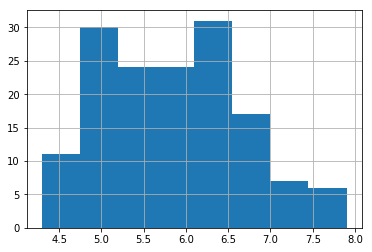

In [9]:
%matplotlib inline

data['sepal length'].hist(bins=8)

We can draw histogram for each group.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcac10f1e48>,
      dtype=object)

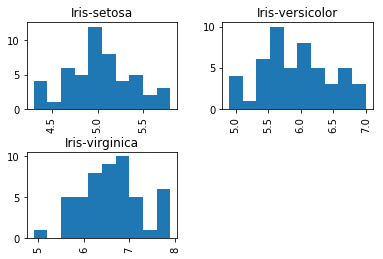

In [10]:
data.hist(column='sepal length', by='class')

3D histogram can be shown.

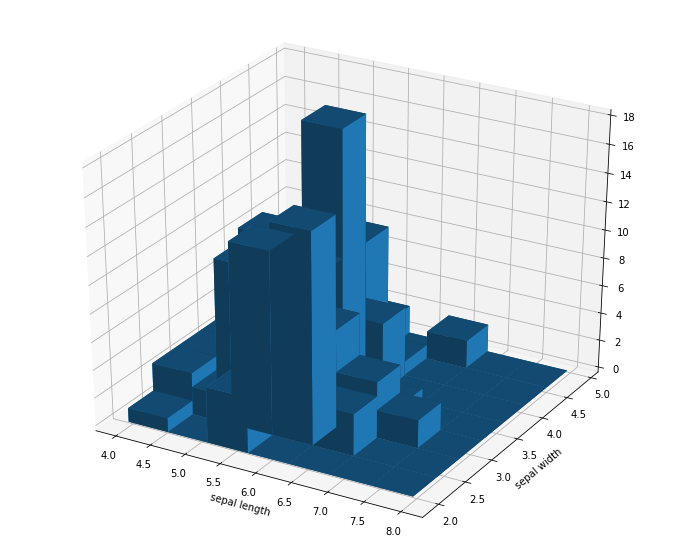

In [11]:
from mpl_toolkits import mplot3d

x = data["sepal length"]
y = data["sepal width"]

XY = np.stack((x,y),axis=-1)

XY_select = XY

xAmplitudes = np.array(XY_select)[:,0]#your data here
yAmplitudes = np.array(XY_select)[:,1]#your other data here


fig = plt.figure(figsize=(12,10)) #create a canvas, tell matplotlib it's 3d
ax = fig.add_subplot(111, projection='3d')


hist, xedges, yedges = np.histogram2d(x, y, bins=(7,7), range = [[4,8],[2,5]]) # you can change your bins, and the range on which to take data
# hist is a 7X7 matrix, with the populations for each of the subspace parts.
xpos, ypos = np.meshgrid(xedges[:-1]+xedges[1:], yedges[:-1]+yedges[1:]) -(xedges[1]-xedges[0])

xpos = xpos.flatten()*1./2
ypos = ypos.flatten()*1./2
zpos = np.zeros_like (xpos)

dx = xedges [1] - xedges [0]
dy = yedges [1] - yedges [0]
dz = hist.flatten()

# cmap = cm.get_cmap('jet') # Get desired colormap - you can change this!
max_height = np.max(dz)   # get range of colorbars so we can normalize
min_height = np.min(dz)
# scale each z to [0,1], and get their rgb values
# rgba = [cmap((k-min_height)/max_height) for k in dz] 

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.show()

A bar plot can be used to show the count of summary statistic for each attribute.

<BarContainer object of 3 artists>

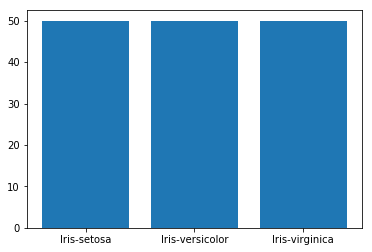

In [12]:
plt.bar(data["class"].unique(), data["class"].value_counts())

Text(0, 0.5, 'Average Sepal Length')

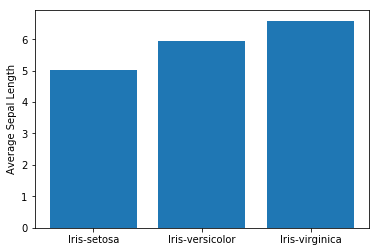

In [13]:
plt.bar(data["class"].unique(), data.groupby("class")["sepal length"].mean())
plt.ylabel("Average Sepal Length")

Or we can draw grouped box plot for every attributes.

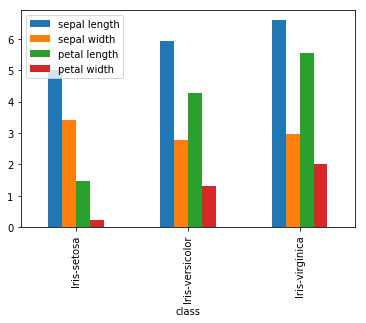

In [14]:
# side-by-side bar plots
data.groupby('class').mean().plot(kind='bar')

A boxplot can also be used to show the distribution of values for each attribute.

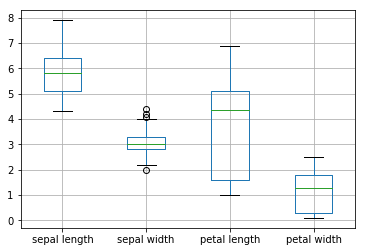

In [15]:
data.boxplot()

For each pair of attributes, we can use a scatter plot to visualize their joint distribution.

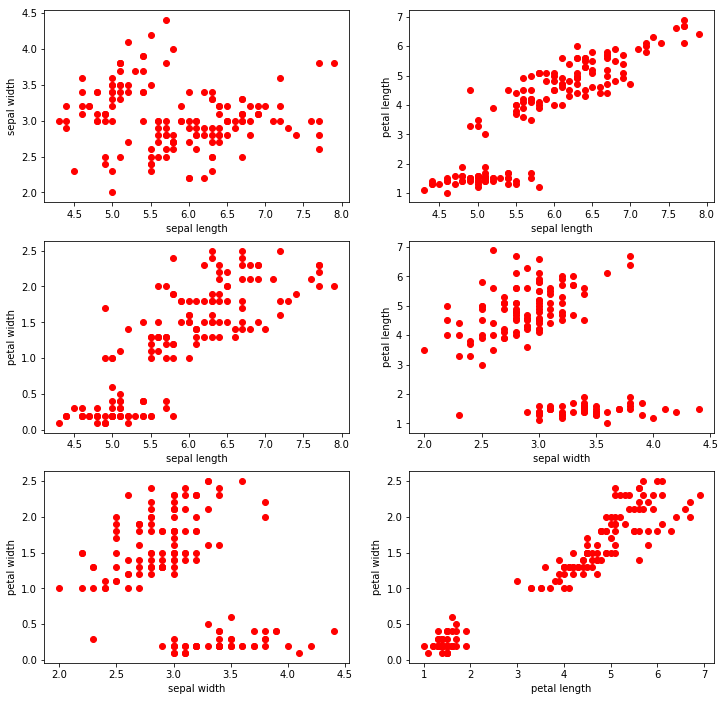

In [16]:
fig, axes = plt.subplots(3, 2, figsize=(12,12))
index = 0
for i in range(3):
    for j in range(i+1,4):
        ax1 = int(index/2)
        ax2 = index % 2
        axes[ax1][ax2].scatter(data[data.columns[i]], data[data.columns[j]], color='red')
        axes[ax1][ax2].set_xlabel(data.columns[i])
        axes[ax1][ax2].set_ylabel(data.columns[j])
        index = index + 1

You can obtain the similar result with only one line below:

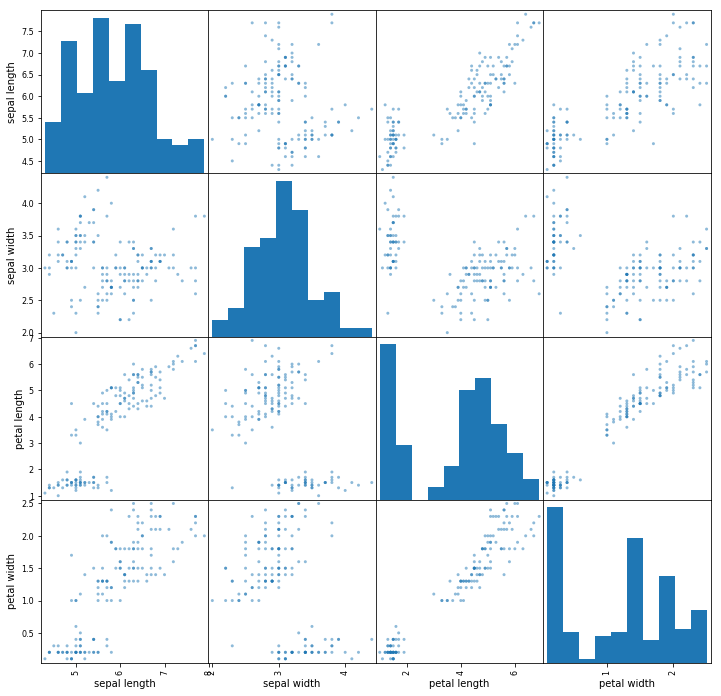

In [17]:
pd.plotting.scatter_matrix(data[data.columns[:4]], figsize=(12, 12))
plt.show()

Also, we can draw the scatter plot which marks different class as different color.

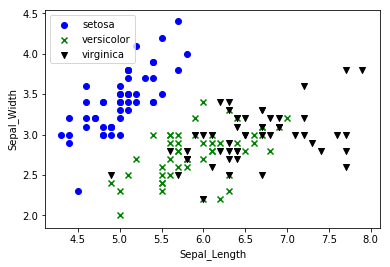

In [18]:
# Divide data by class
setosa = data[data['class'] =='Iris-setosa']
versicolor = data[data['class'] =='Iris-versicolor']
virginica = data[data['class'] =='Iris-virginica']


# Mark different
setosa_sc = plt.scatter(setosa['sepal length'],setosa['sepal width'], marker='o', color='b')
versicolor_sc = plt.scatter(versicolor['sepal length'],versicolor['sepal width'], marker='x', color='g')
virginica_sc = plt.scatter(virginica['sepal length'],virginica['sepal width'], marker='v', color='k')

plt.legend((setosa_sc,versicolor_sc,virginica_sc), ('setosa','versicolor','virginica'),loc='upper left')

plt.xlabel("Sepal_Length")
plt.ylabel("Sepal_Width")
plt.show()

Parallel coordinates can be used to display all the data points simultaneously. Parallel coordinates have one coordinate axis for each attribute, but the different axes are parallel to one other instead of perpendicular, as is traditional. Furthermore, an object is represented as a line instead of as a point. In the example below, the distribution of values for each class can be identified in a separate color.

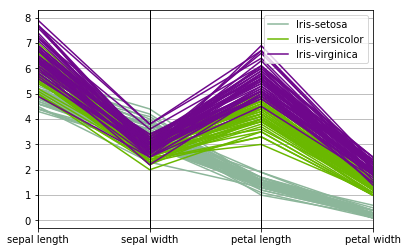

In [19]:
from pandas.plotting import parallel_coordinates
%matplotlib inline

parallel_coordinates(data, 'class')

To draw the correlation heatmap, you can use another library called `seaborn`.

In [20]:
import seaborn as sns

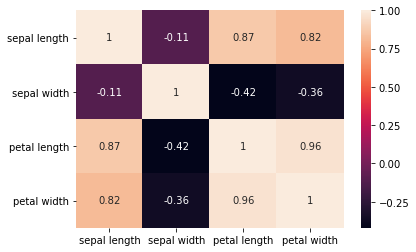

In [21]:
sns.heatmap(data.corr(), annot=True)

After each plotting, you can save the figure using `savefig`.

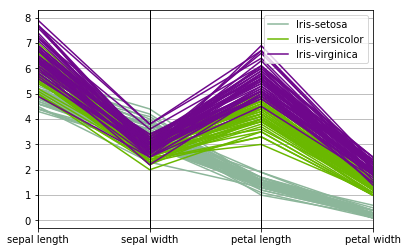

In [22]:
parallel_coordinates(data, 'class')
plt.savefig('parallel_coordinate.png')

## 4.3. Exercises

In the exercise, let's use the titanic.csv file that I have uploaded in lab 3 session.
Read the csv file using `pd.read_csv`

In [23]:
data = pd.read_csv("titanic.csv")

In [24]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


1. Get the summary statistics of all columns

2. To do further analysis, we have to remove the NaN values. First, let's check how many NaN is in the dataset.

In [25]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There are 177 NaN in 'Age', 687 NaN in 'Cabin, and 2 in 'Embarked'.
Remove the all of rows that contains at least one NaN.

3. Draw the histogram of column 'Age' with 10 bins

4. Draw the histogram of column 'Age' with 10 bins, grouped by 'Survived'

5. Draw a scatter plot for Age and Fare.

6. Draw a scatter plot for Age and Fare, where data with different `survived` having different mark.

7. Draw a bar plot showing the mean of Age and Fare for each group divided by `Survived`.